In [1]:
# load necessary modules

import numpy as np
import pandas as pd
from functools import partial
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import matplotlib as mpl
%matplotlib inline

In [2]:
resolution = 200

In [3]:
def draw_stat(mu0, sigma0, mu1, sigma1, q = 0.5, resolution = 100):
    lbd_list = np.arange(-max(q,1-q)+0.0005, max(q,1-q),0.0005)
    def g(lbd, sigma = 2, mu = (-1, 0)):
        def p_inverse(y):
            return - np.log(max(1/y-1, 1e-10))
        return norm.cdf(p_inverse(1/2+lbd/2/q), loc = mu[1], scale = sigma) - norm.cdf(p_inverse(1/2-lbd/2/(1-q)), loc = mu[0], scale = sigma)

    g0 = partial(g, sigma = sigma0, mu = mu0)
    g1 = partial(g, sigma = sigma1, mu = mu1)
    g0_v = np.vectorize(g0)
    g1_v = np.vectorize(g1)

    df = pd.DataFrame({'lambda': lbd_list, 'g0(lambda)': g0_v(lbd_list), 'g1(lambda)': g1_v(lbd_list)})

    def global_fv(c0, c1):
        def g0_inverse(c):
            if c < abs(g0(0)): 
                if g0(0)>0:
                    return df[df['g0(lambda)'] < c]['lambda'].iloc[-1]
                else:
                    return df[df['g0(lambda)'] > -c]['lambda'].iloc[0]
            else:
                return 0
        def g1_inverse(c):
            if c < abs(g1(0)): 
                if g1(0) > 0:
                    return df[df['g1(lambda)'] < c]['lambda'].iloc[-1]
                else:
                    return df[df['g1(lambda)'] > -c]['lambda'].iloc[0]
            else:
                return 0
        lbd0 = g0_inverse(c0)
        lbd1 = g1_inverse(c1)
        l0 = (2*int(g0(0)>0)-1) * min(abs(g0(0)),c0)
        l1 = (2*int(g1(0)>0)-1) * min(abs(g1(0)),c1)
        return (l0 + l1 + g0(lbd1) + g1(lbd0))/4 
    
    c0, c1 = np.meshgrid(np.arange(0,1,1/resolution), np.arange(0,1,1/resolution))
    epsilon = np.zeros(c0.shape)
    for i in range(epsilon.shape[0]):
        for j in range(epsilon.shape[1]):
            epsilon[i,j] = global_fv(c0[i,j],c1[i,j])
    return [c0, c1, epsilon]

In [4]:
subplots = [draw_stat(mu0 = (0, 0), sigma0 = 70, mu1 = (3, -1), sigma1 = 1, q = 0.5, resolution = resolution)]

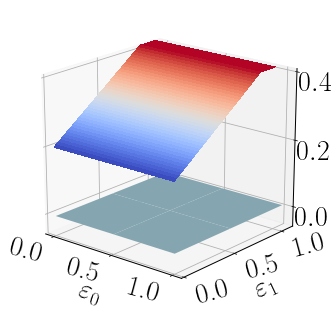

In [28]:
width = 5
height = width/1.3

i = 0

plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend
        
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
fig.subplots_adjust(left=.02, bottom=.02, right=0.9, top=1.1) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure

ax.plot_surface(subplots[i][0], subplots[i][1], subplots[i][2], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel(r'$\varepsilon_0$')
ax.set_ylabel(r'$\varepsilon_1$')
ax.set_zlabel(r'$\varepsilon$')
ax.set_xticklabels(ax.get_xticks(), rotation=-15, verticalalignment='center', horizontalalignment='right')
ax.xaxis.labelpad = 10
ax.set_yticklabels([0.0, 0.5, 1.0], rotation=15, verticalalignment='center', horizontalalignment='left')
ax.yaxis.labelpad = 10
# ax.set_zticklabels(ax.get_zticks(), verticalalignment='center', horizontalalignment='left')
ax.zaxis.labelpad = 10
ax.tick_params(axis="z",direction="in", pad=4)
ax.set_zticks([0.0, 0.2, 0.4])
ax.set_zlim(-0.05, 0.4)
ax.set_ylim(0, 1.1)
ax.view_init(20, -50)
hx, hy = np.meshgrid(np.arange(0,1.5,0.5), np.arange(0,1.65,0.55))
hz = np.zeros(9).reshape(3,3)
ax.plot_surface(hx, hy, hz, color="lightblue")

plt.savefig('example8.pdf')
None